# Eda and predict

# Information
The COVID-19 pandemic in India is a part of the worldwide pandemic of coronavirus disease 2019 (COVID-19) caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). The first case of COVID-19 in India, which originated from China, was reported on 30 January 2020. Currently, India has the largest number of confirmed cases in Asia. As of 12 June 2021, India has the second-highest number of confirmed cases in the world (after the United States) with 29.3 million reported cases of COVID-19 infection and the third-highest number of COVID-19 deaths (after the United States and Brazil) at 367,081 deaths.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# İmport Section
import matplotlib.pyplot as plt
import seaborn as sns

# Load and Check Data

In [4]:
df= pd.read_csv('Latest Covid-19 India Status.csv')

Data columns
State/UTs : Names of Indian States and Union Territories.
Total Cases : Total number of confirmed cases
Active : Total number of active cases
Discharged : Total number of discharged cases
Deaths : Total number of deaths
Active Ratio : Ratio of active cases to total cases
Discharge Ratio : Ratio of discharged cases to total cases
Death Ratio : Ratio of deaths to total cases

In [5]:
df.info() # as we can see there is no missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
State/UTs              36 non-null object
Total Cases            36 non-null int64
Active                 36 non-null int64
Discharged             36 non-null int64
Deaths                 36 non-null int64
Active Ratio (%)       36 non-null float64
Discharge Ratio (%)    36 non-null float64
Death Ratio (%)        36 non-null float64
dtypes: float64(3), int64(4), object(1)
memory usage: 2.3+ KB


In [6]:
df.shape

(36, 8)

In [7]:
df.describe()


,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
count,3.600000e+01,36.000000,3.600000e+01,36.000000,36.000000,36.000000,36.000000
mean,8.968294e+05,10205.972222,8.746090e+05,12014.416667,1.682222,97.052222,1.265000
std,1.303563e+06,30660.005408,1.262310e+06,23205.834381,3.335660,3.239175,0.564464
min,7.549000e+03,1.000000,7.419000e+03,4.000000,0.010000,81.440000,0.040000
25%,6.981775e+04,213.750000,6.598125e+04,803.750000,0.067500,97.150000,0.947500
50%,4.645165e+05,1062.500000,4.546995e+05,5322.500000,0.570000,98.200000,1.320000
75%,9.980822e+05,7369.500000,9.826742e+05,13579.500000,1.337500,98.597500,1.607500
max,6.401213e+06,175695.000000,6.201168e+06,135255.000000,18.190000,99.920000,2.720000


In [8]:
df.head()


,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
0,Andaman and Nicobar,7549,1,7419,129,0.01,98.28,1.71
1,Andhra Pradesh,1995669,16341,1965657,13671,0.82,98.50,0.69
2,Arunachal Pradesh,51655,1763,49640,252,3.41,96.10,0.49
3,Assam,581398,8772,567113,5513,1.51,97.54,0.95
4,Bihar,725518,204,715665,9649,0.03,98.64,1.33


# Data Analysis


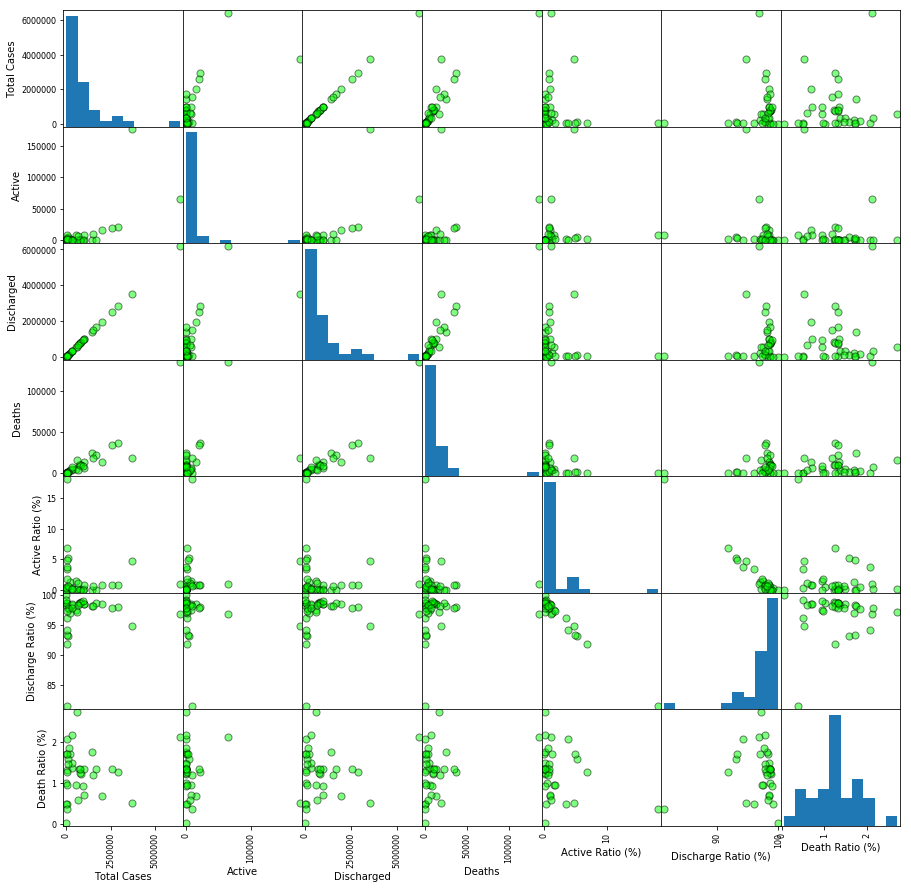

In [9]:
color_list=["lime"]
pd.plotting.scatter_matrix(df,
                          figsize=[15,15],
                          c=color_list,
                          diagonal='hist',
                          alpha=0.5,
                          s=200,
                          marker='.',
                          edgecolor='black') 
plt.show()

# Correlation

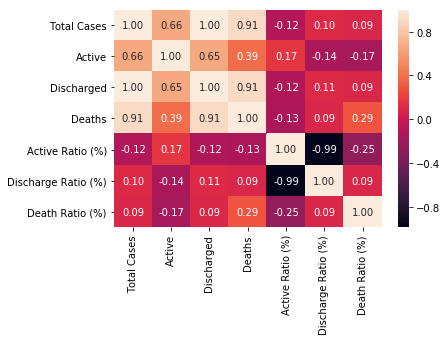

In [10]:
sns.heatmap(df.corr(),annot=True,fmt='.2f')

# We can see that there is correlation between


Total Cases -(Active,Discharged,Deats)
Active -(Discharged,Deaths)
Discharged-Deaths


Active Ratio-Discharge Ratio

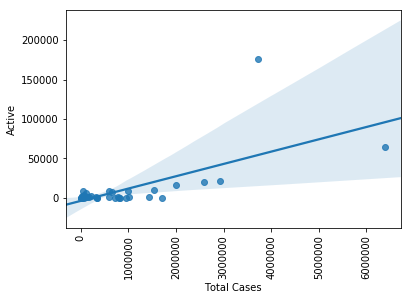

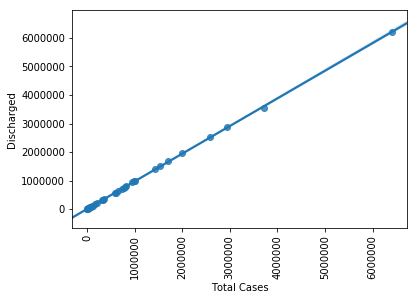

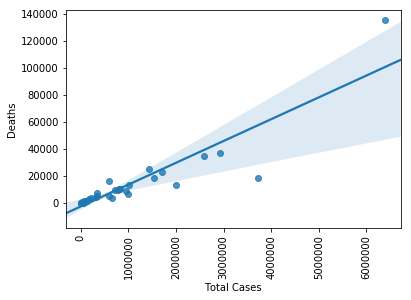

In [14]:
# now visualization
def total_other(fea):
    for i in fea:
        sns.regplot(x=df["Total Cases"],y=df[i])
        plt.xticks(rotation=90)
        plt.show()
total_other(["Active","Discharged","Deaths"])

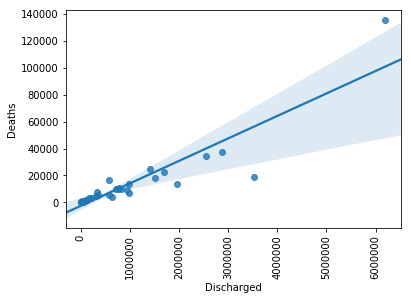

In [13]:
sns.regplot(x=df["Discharged"],y=df["Deaths"])
plt.xticks(rotation=90)
plt.show()

# Most Deaths

In [15]:
df_=df.sort_values(by='Deaths',ascending=False).iloc[0:5]
df_

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
20,Maharashtra,6401213,64790,6201168,135255,1.01,96.87,2.11
15,Karnataka,2931827,21507,2873281,37039,0.73,98.00,1.26
30,Tamil Nadu,2592436,20225,2537632,34579,0.78,97.89,1.33
8,Delhi,1437156,471,1411612,25073,0.03,98.22,1.74
33,Uttar Pradesh,1708991,420,1685785,22786,0.02,98.64,1.33


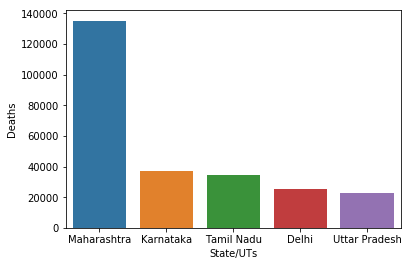

In [16]:
sns.barplot(x=df_['State/UTs'],y=df_.Deaths)
plt.show()

# Active case

In [17]:
df_=df.sort_values(by="Active",ascending=False).iloc[:5]
df_

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
16,Kerala,3724030,175695,3529465,18870,4.72,94.78,0.51
20,Maharashtra,6401213,64790,6201168,135255,1.01,96.87,2.11
15,Karnataka,2931827,21507,2873281,37039,0.73,98.00,1.26
30,Tamil Nadu,2592436,20225,2537632,34579,0.78,97.89,1.33
1,Andhra Pradesh,1995669,16341,1965657,13671,0.82,98.50,0.69


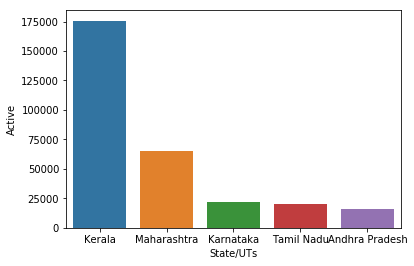

In [18]:
sns.barplot(x=df_["State/UTs"],y=df_.Active)

# Prediction part

Discharged-Active

Deaths-Active

Discharged- Deaths

Total Cases -(Active,Discharged,Deats)

# Discharged-Active

r2_score :  0.42684432820832996


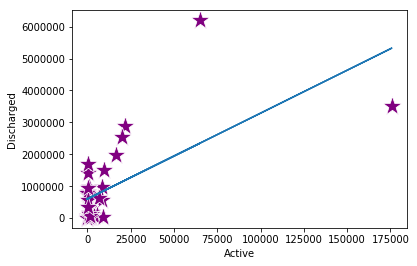

In [19]:
#Discharged-Active
sns.scatterplot(y=df.Discharged,x=df.Active,marker="*",s=400,color="purple")

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

y=df.Discharged.values.reshape(-1,1)
x=df.Active.values.reshape(-1,1)

linear_regression=LinearRegression()
linear_regression.fit(x,y)
y_head=linear_regression.predict(x)
# for reliability
print("r2_score : " ,r2_score(y,y_head)) #0.75688871935345 our confidence rate is 75 not good


plt.plot(x,y_head)

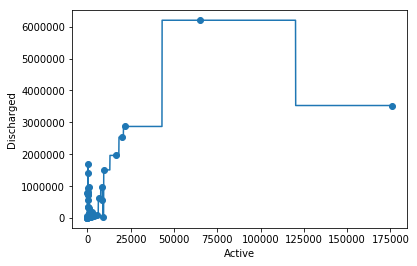

In [20]:
#Decision Tree ile
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor()
y=df.Discharged.values.reshape(-1,1)
x=df.Active.values.reshape(-1,1)
tree_reg.fit(x,y)
x_=np.arange(min(x),max(x),100).reshape(-1,1)
y_head=tree_reg.predict(x_)
plt.ylabel("Discharged")
plt.xlabel("Active")
plt.scatter(x,y)
plt.plot(x_,y_head)

# Deaths-Active

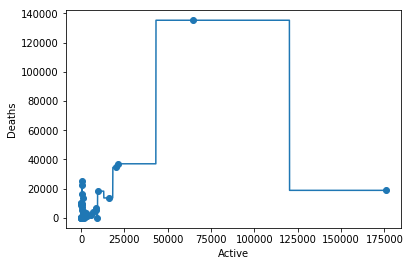

In [21]:
y=df.Deaths.values.reshape(-1,1)
x=df.Active.values.reshape(-1,1)
plt.xlabel("Active")
plt.ylabel("Deaths")
plt.scatter(x,y)
#Again with decision tree
tree_reg.fit(x,y)
x_=np.arange(min(x),max(x),100).reshape(-1,1)
y_head=tree_reg.predict(x_)
plt.plot(x_,y_head)

# Discharged- Deaths

r2_score :  0.8257823437490894


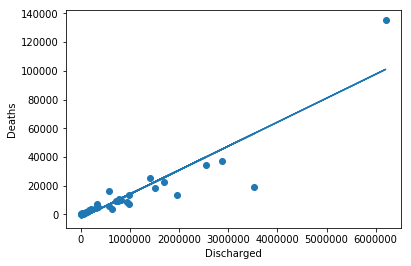

In [22]:
y=df.Deaths.values.reshape(-1,1)
x=df.Discharged.values.reshape(-1,1)
plt.scatter(x,y) #ı think there is a linear relation

linear_regression=LinearRegression()
linear_regression.fit(x,y)
y_head=linear_regression.predict(x)
# for reliability
print("r2_score : " ,r2_score(y,y_head)) #0.8465507400257989 our confidence rate is 84 not bad
plt.xlabel("Discharged")
plt.ylabel("Deaths")

plt.plot(x,y_head)

r2_score :  0.9718281832806088


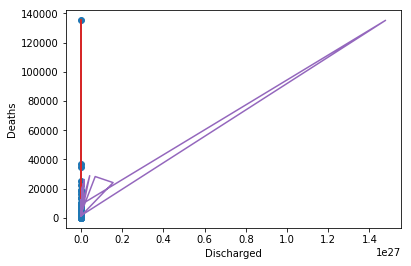

In [23]:
from sklearn.preprocessing import PolynomialFeatures
pol_reg=PolynomialFeatures(degree=4)

x_pol=pol_reg.fit_transform(x)
linear_regression.fit(x_pol,y)
y_head=linear_regression.predict(x_pol)

plt.scatter(x,y)
plt.xlabel("Discharged")
plt.ylabel("Deaths")
plt.plot(x_pol,y_head)

print("r2_score : " ,r2_score(y,y_head)) # 0.9588840996715609 much better

# Total Cases- Active

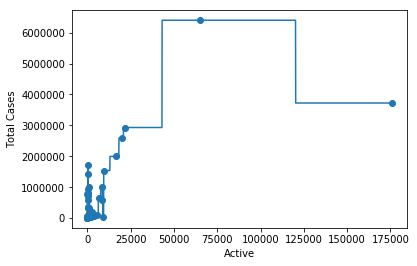

In [24]:
x=df["Active"].values.reshape(-1,1)
y=df["Total Cases"].values.reshape(-1,1)
plt.scatter(x,y)
plt.xlabel("Active")
plt.ylabel("Total Cases")
#with decision tree
tree_reg.fit(x,y)
x_=np.arange(min(x),max(x),100).reshape(-1,1)
y_head=tree_reg.predict(x_)
plt.plot(x_,y_head)

# Total Cases- Discharged

r2_score :  0.9997954597906865


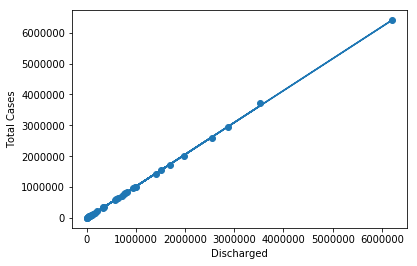

In [25]:
x=df["Discharged"].values.reshape(-1,1)
y=df["Total Cases"].values.reshape(-1,1)
plt.scatter(x,y)
plt.xlabel("Discharged")
plt.ylabel("Total Cases")
#linear regression
linear_regression=LinearRegression()
linear_regression.fit(x,y)
y_head=linear_regression.predict(x)
plt.plot(x,y_head)
# for reliability
print("r2_score : " ,r2_score(y,y_head)) #0.999 already true

# Total Cases- Deaths


r2_score :  0.9587146447083583


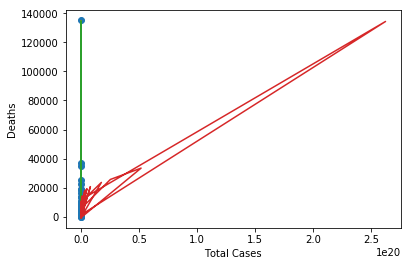

In [26]:
y=df["Deaths"].values.reshape(-1,1)
x=df["Total Cases"].values.reshape(-1,1)
plt.scatter(x,y)
plt.ylabel("Deaths")
plt.xlabel("Total Cases")

#ı think its polynomial
pol_reg=PolynomialFeatures(degree=3)
x_pol=pol_reg.fit_transform(x)
linear_regression.fit(x_pol,y)
y_head=linear_regression.predict(x_pol)
plt.plot(x_pol,y_head)

print("r2_score : " ,r2_score(y,y_head)) # 0.9567761376968864